In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Read Sephora CSV file into a DataFrame

sephora_df = pd.read_csv("sephora.csv")

In [30]:
# Create new DataFrame with only brand, category, name, price, rating, and details columns

perfume_df = sephora_df.loc[sephora_df["category"] == "Perfume", ['brand', 'category', 'name', 'price', 'rating', 'details']]

In [31]:
# List of target perfumes

target_perfumes = ["KAYALI VANILLA | 28", "Juicy Couture", "Her Eau de Parfum"]

In [32]:
# Convert all text in details columns to lowercase and remove non-alphanumeric characters

perfume_df['details'] = perfume_df['details'].str.lower() 
perfume_df['details'] = perfume_df['details'].str.replace(r'[^\w\s]', '') 

/var/folders/xf/b8lhfxk91lsfww4x27m9hf_00000gn/T/ipykernel_36027/989719752.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  perfume_df['details'] = perfume_df['details'].str.replace(r'[^\w\s]', '')


In [33]:
# Initialize empty dictionary which will contain similar perfumes and initialize dictionary to contain similarity scores

similar_perfumes = {}
similarities = {}  

# Iterate through perfumes in target perfumes list and calculate Jaccard similarity with other perfumes

for target_perfume in target_perfumes:
    if target_perfume in perfume_df['name'].values:
        target_details = set(perfume_df[perfume_df['name'] == target_perfume]['details'].iloc[0].split())

        similarity_scores = {}
        for idx, row in perfume_df.iterrows():
            details = set(row['details'].split())
            if row['name'] != target_perfume:
                intersection = len(target_details.intersection(details))
                union = len(target_details.union(details))
                similarity_score = intersection / union
                
                similarity_scores[row['name']] = similarity_score

        # Sort by Jaccard similarity scores and get top 10 similar perfumes
        
        similar_perfumes[target_perfume] = sorted(similarity_scores, key=similarity_scores.get, reverse=True)[:10]
        similarities[target_perfume] = [similarity_scores[perfume] for perfume in similar_perfumes[target_perfume]]
    else:
        print(f"Target perfume '{target_perfume}' not found in the DataFrame.")


In [34]:
# Print each target perfume, followed by 10 similar perfumes and their information including name, brand, price, rating, and details

for target_perfume, similar_list in similar_perfumes.items():
    print(f"Similar perfumes to '{target_perfume}':")
    for similar_perfume in similar_list:
        similar_perfume_details = perfume_df[perfume_df['name'] == similar_perfume][['brand', 'price', 'rating', 'details']].iloc[0]
        print(f"\n{similar_perfume}\nBrand: {similar_perfume_details['brand']}\nPrice: {similar_perfume_details['price']}\nRating: {similar_perfume_details['rating']}\nDetails: {similar_perfume_details['details']}")
    print()

Similar perfumes to 'KAYALI VANILLA | 28':

KAYALI MUSK | 12
Brand: HUDA BEAUTY
Price: 118.0
Rating: 4.0
Details: fragrance family floralscent type powdery floralskey notes jasmine musks sandalwoodfragrance description emanating power and confidence musk  12 begins with magnificent notes of lotus flower freesia and sheer jasmine laced with exquisite musk the scent shines a light on one of the worlds most mysterious ingredients a voluptuous blend of vanilla and creamy sandalwood gives this distinguished fragrance an enchanting and tempered soulthe number 12 indicates the 12 rounds of formulations it took to achieve the perfect balance of soft and warm about the fragrance kayali which translates from arabic to my imagination features a collection of captivating fragrances handcrafted in france using the most luxurious ingredients this first collection is designed to be layered and combined to create a scent that is truly yours inspired by the rich heritage of the middle east kayali refle

In [36]:
# Store similar perfumes and information in a DataFrame

df_info = []

for target_perfume, similar_list in similar_perfumes.items():
    for similar_perfume, similarity_score in zip(similar_list, similarities[target_perfume]):
        similar_perfume_details = perfume_df[perfume_df['name'] == similar_perfume][['brand', 'price', 'rating', 'details']].iloc[0]
        df_rows = {
            'Original Perfume': target_perfume,
            'Similar Perfume': similar_perfume,
            'Similar Perfume Brand': similar_perfume_details['brand'],
            'Similar Perfume Price': similar_perfume_details['price'],
            'Similar Perfume Rating': similar_perfume_details['rating'],
            'Similar Perfume Details': similar_perfume_details['details'],
            'Jaccard Similarity Score': similarity_score
        }
        df_info.append(df_rows)


similar_perfumes_df = pd.DataFrame(df_info)

similar_perfumes_df


,Original Perfume,Similar Perfume,Similar Perfume Brand,Similar Perfume Price,Similar Perfume Rating,Similar Perfume Details,Jaccard Similarity Score
0,KAYALI VANILLA | 28,KAYALI MUSK | 12,HUDA BEAUTY,118.0,4.0,fragrance family floralscent type powdery flor...,0.650794
1,KAYALI VANILLA | 28,KAYALI ELIXIR | 11,HUDA BEAUTY,118.0,3.5,fragrance family floralscent type warm florals...,0.635897
2,KAYALI VANILLA | 28,KAYALI CITRUS | 08,HUDA BEAUTY,118.0,4.0,fragrance family freshscent type fresh citrus ...,0.601010
3,KAYALI VANILLA | 28,KAYALI DÉJÀ VU WHITE FLOWER | 57,HUDA BEAUTY,85.0,4.5,fragrance family floralsscent type warm floral...,0.340659
4,KAYALI VANILLA | 28,Willow Eau de Toilette,SKYLAR,78.0,4.5,fragrance family earthy woodyscent type warm ...,0.154167
5,KAYALI VANILLA | 28,Willow Eau de Toilette Rollerball,SKYLAR,29.0,4.5,fragrance family earthy woodyscent type warm ...,0.154167
6,KAYALI VANILLA | 28,Coral Eau de Toilette,SKYLAR,78.0,5.0,fragrance family floralscent type fruity flora...,0.152542
7,KAYALI VANILLA | 28,Coral Eau de Toilette Rollerball,SKYLAR,29.0,5.0,fragrance family floralscent type fruity flora...,0.152542
8,KAYALI VANILLA | 28,Gilded Fox,PINROSE,77.0,4.0,fragrance family warm spicyscent type warm s...,0.151685
9,KAYALI VANILLA | 28,Moab Eau de Parfum,PHLUR,96.0,4.5,fragrance family warm spicyscent type warm s...,0.150943


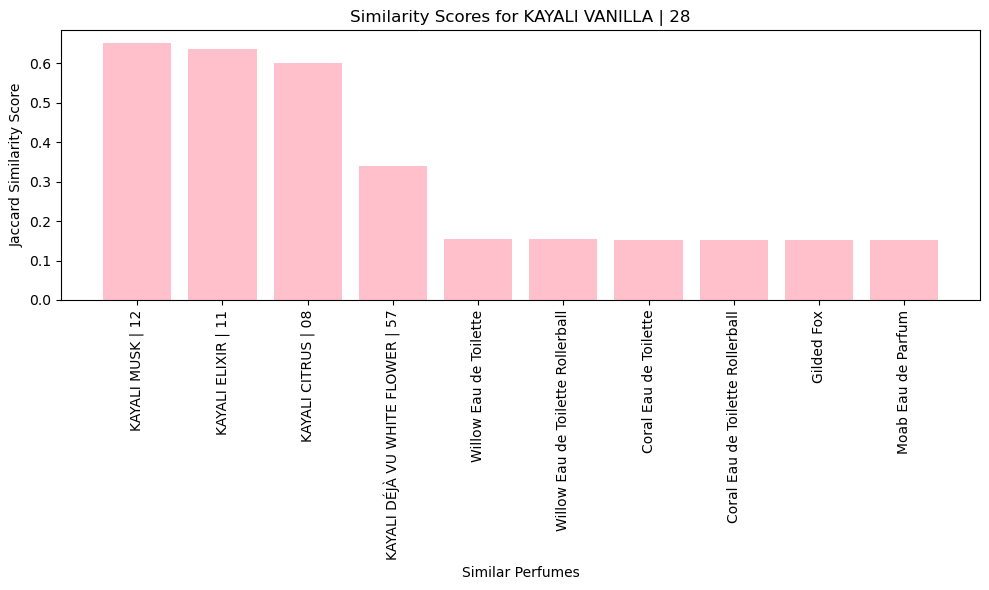

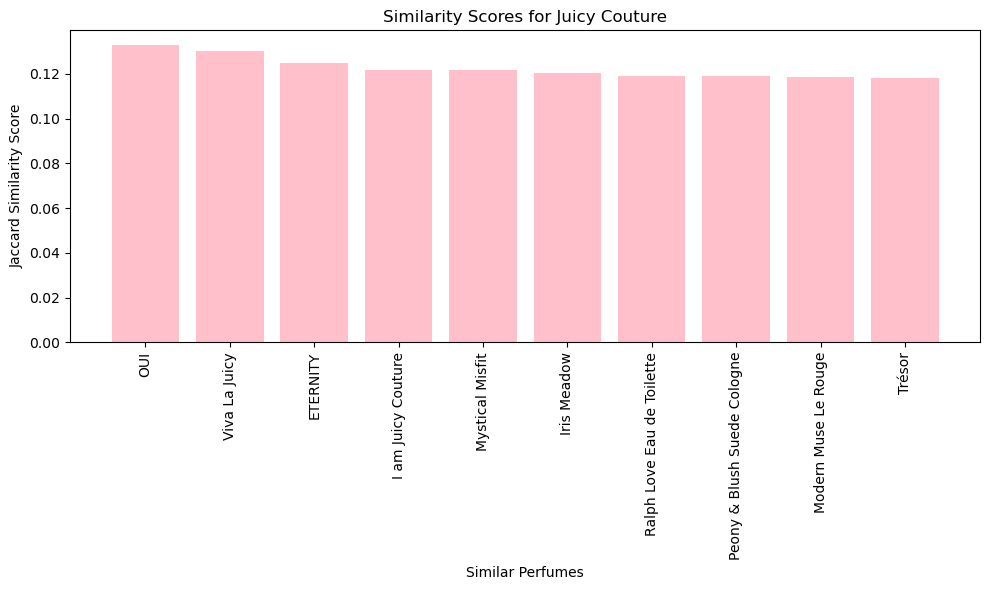

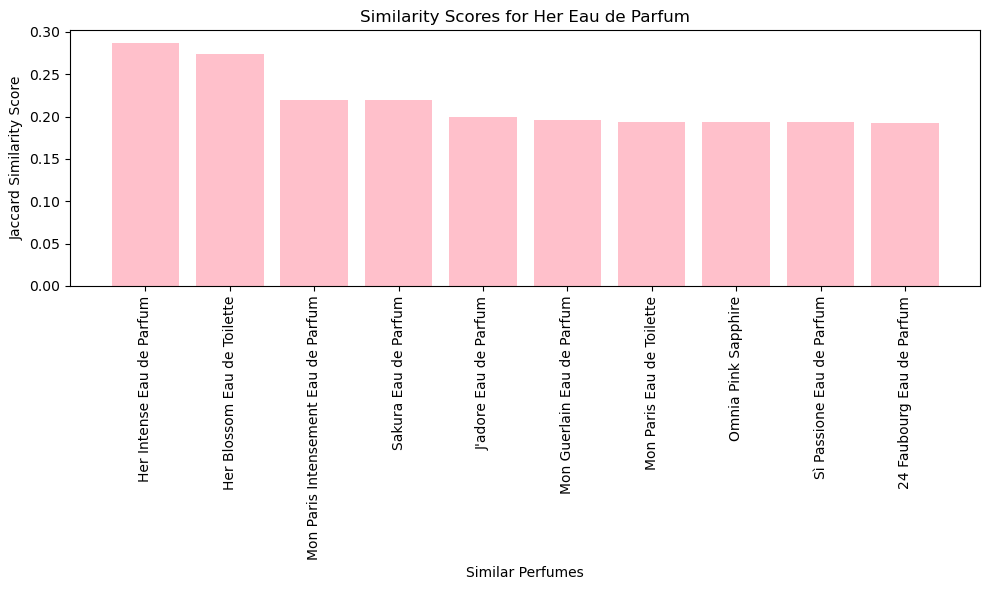

In [38]:
# Iterate through target perfumes and create bar graphs based on Jaccard similarity scores

for target_perfume in similar_perfumes_df['Original Perfume'].unique():
    subset_df = similar_perfumes_df[similar_perfumes_df['Original Perfume'] == target_perfume]
    similar_perfumes = subset_df['Similar Perfume']
    similarity_scores = subset_df['Jaccard Similarity Score']

    plt.figure(figsize=(10, 6))
    plt.bar(similar_perfumes, similarity_scores, color='pink')
    plt.title(f"Similarity Scores for {target_perfume}")
    plt.xlabel('Similar Perfumes')
    plt.ylabel('Jaccard Similarity Score')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
